In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,BatchNormalization,GlobalAveragePooling2D,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
import keras

Importing the root Directory for Splitting

In [ ]:
ROOT_DIR='/content/drive/MyDrive/DataSet'
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)) )
  
number_of_images.items()  

dict_items([('Testing', 2), ('Training', 2)])

We will Split the Data As 70% for Training and 30% for testing

In [ ]:
# # Function for splitting the data 

# def dataFolder(p,split):
#   if not os.path.exists('./'+p):
#     os.mkdir('./'+p)

#     for dir in os.listdir(ROOT_DIR):
#       os.makedirs('./'+p+'/'+dir)
#       for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir) ),size=(math.floor(split*number_of_images[dir])-5),replace=False):
#         O=os.path.join(ROOT_DIR,dir,img)
#         D=os.path.join('./'+p,dir)
#         shutil.copy(O,D)
        
#   else:
#     print(f"{p} folder exists")

In [ ]:
#Running the Split function for Training Data
# dataFolder("train",0.7)

In [ ]:
# #Running the Split function for Testing Data
# dataFolder("test",0.3)

Cnn Model Creation

In [ ]:
#Model Layers
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#Compiling the Model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

Preparing Our images Using Data Generator

In [ ]:
#For Training Images
image_data= ImageDataGenerator (zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
train_data= image_data.flow_from_directory(
    directory='/content/drive/MyDrive/DataSet/Training',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 4391 images belonging to 2 classes.


In [ ]:
#For Testing
image_data= ImageDataGenerator (zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
test_data= image_data.flow_from_directory(
    directory='/content/drive/MyDrive/DataSet/Testing',
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 1011 images belonging to 2 classes.


In [ ]:
#Early stopping and model checkpoint

from keras.callbacks import ModelCheckpoint,EarlyStopping
import scipy
#Early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=6,verbose=1,mode='auto')
mc=ModelCheckpoint(monitor='val_accuracy',filepath="bestModel.h5",
                   save_best_only=True,
                   verbose=1,mode='auto')
cd=[es,mc]

Model Tranning

In [ ]:
hs=model.fit_generator (generator= train_data,

steps_per_epoch =8,

epochs= 20,

verbose= 1,

validation_data =test_data,

validation_steps= 12,

callbacks =cd)

<ipython-input-11-8d4721111102>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator (generator= train_data,


Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.5273
Epoch 1: val_accuracy improved from -inf to 0.64844, saving model to bestModel.h5
8/8 [==============================] - 335s 39s/step - loss: 0.7035 - accuracy: 0.5273 - val_loss: 0.6689 - val_accuracy: 0.6484
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.6445
Epoch 2: val_accuracy did not improve from 0.64844
8/8 [==============================] - 196s 26s/step - loss: 0.6642 - accuracy: 0.6445 - val_loss: 0.6488 - val_accuracy: 0.6146
Epoch 3/20
8/8 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.7852
Epoch 3: val_accuracy improved from 0.64844 to 0.80990, saving model to bestModel.h5
8/8 [==============================] - 127s 16s/step - loss: 0.5071 - accuracy: 0.7852 - val_loss: 0.4390 - val_accuracy: 0.8099
Epoch 4/20
8/8 [==============================] - ETA: 0s - loss: 0.4076 - accuracy: 0.8164
Epoch 4: val_accuracy did n

Model Graphical Interpretaion

In [ ]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

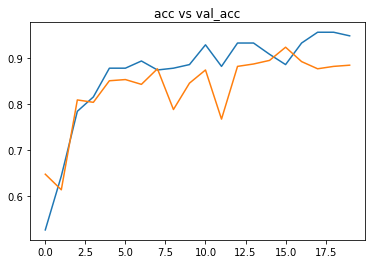

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('acc vs val_acc')
plt.show()

In [ ]:
#Model Accuracy
from keras.models import load_model
model =load_model("/content/bestModel.h5")

Model Accuracy

In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f"The Accuracy of our model is: {acc}")

<ipython-input-15-60849963a618>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_data)[1]


The Accuracy of our model is: 0.9010880589485168


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [ ]:
path="/content/drive/MyDrive/DataSet/Testing/Healthy/Te-no_0366.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict(input_arr)[0][0]
pred

if pred>0.6:
  print("Healthy",pred)
else:
  print("Brain Tumor",pred)